<a href="https://colab.research.google.com/github/online6731/Content-Based-Image-Retrieval/blob/main/Content_Based_Image_Retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem

Content Based Image Retrieval on [The Oxford Buildings Dataset](https://www.robots.ox.ac.uk/~vgg/data/oxbuildings/)

# Environment

In [ ]:
#@title Import { vertical-output: true }

! pip install ipyplot -q

import cv2
import glob
import ipyplot
import warnings
import skimage.io
import pandas as pd
import scipy.spatial.distance

warnings.filterwarnings('ignore')


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `base_64` param to `True`.
        


In [ ]:
#@title Data

! rm -rf *
! wget https://www.robots.ox.ac.uk/~vgg/data/oxbuildings/oxbuild_images.tgz
! mkdir dataset
! cd dataset && tar -xzf ../oxbuild_images.tgz

--2021-06-02 05:57:24--  https://www.robots.ox.ac.uk/~vgg/data/oxbuildings/oxbuild_images.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1980280437 (1.8G) [application/x-gzip]
Saving to: ‘oxbuild_images.tgz’

oxbuild_images.tgz  100%[===================>]   1.84G  31.2MB/s    in 62s     

2021-06-02 05:58:26 (30.7 MB/s) - ‘oxbuild_images.tgz’ saved [1980280437/1980280437]



# Solution

In [ ]:
#@title Dataset { run: "auto", vertical-output: true }
images_n = 4500 #@param {type:"slider", min:500, max:5000, step:100}
features_n = 20 #@param {type:"slider", min:0, max:100, step:1}
image_similarity_measure = scipy.spatial.distance.euclidean #@param ["scipy.spatial.distance.euclidean", "scipy.spatial.distance.cosine", "scipy.spatial.distance.cityblock", "scipy.spatial.distance.chebyshev"] {type:"raw"}

images = pd.DataFrame([{'path': path,
                        'hist': cv2.calcHist([cv2.imread(path)], [0], None, [256], [0, 256])}
                       for path in glob.glob('./dataset/*.jpg')[:images_n]])

images['feature'] = scipy.fft.dct([[image_similarity_measure(x, y) for x in images['hist']] for y in images['hist']], n=features_n).tolist()

images.head(1)

,path,hist,feature
0,./dataset/magdalen_000852.jpg,"[[132727.0], [31007.0], [32444.0], [76129.0], ...","[6552600.53125, -182630.56909285748, -375542.4..."



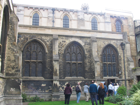
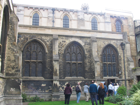
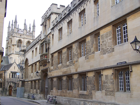
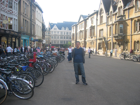
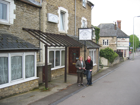
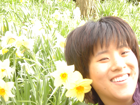
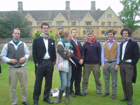
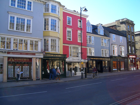
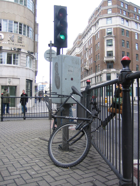
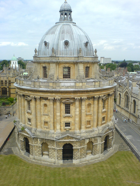
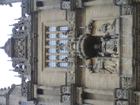
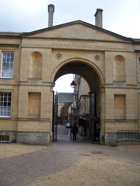


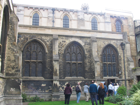
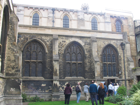
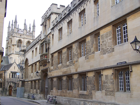
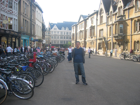
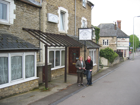
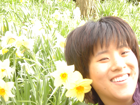
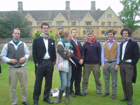
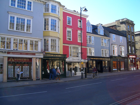
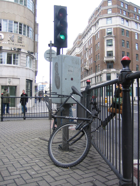
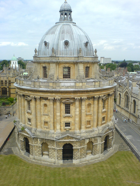
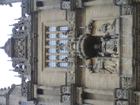
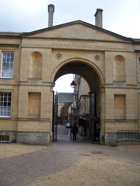

In [ ]:
#@title Search{ run: "auto" }
feature_similarity_measure = scipy.spatial.distance.euclidean #@param ["scipy.spatial.distance.euclidean", "scipy.spatial.distance.cosine", "scipy.spatial.distance.cityblock", "scipy.spatial.distance.chebyshev"] {type:"raw"}
query = 261 #@param {type:"slider", min:0, max:500, step:1}
results_n = 10 #@param {type:"slider", min:1, max:50, step:1}

results = images.sort_values(by=["feature"], key=lambda features: features.apply(lambda feature: feature_similarity_measure(feature, images['feature'][query])))

ipyplot.plot_images(images=[skimage.io.imread(image_path) for image_path in [images['path'][query], *results['path'].tolist()]],
                    labels=['Query'] + [f'Result {i}' for i in range(results_n + 1)],
                    img_width=140, max_images=results_n + 2)